<a href="https://colab.research.google.com/github/JislordCodes/medical-insurance-cost-prediction/blob/main/medical_insurance_cost_prediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Cost Prediction

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview 👩🏻‍💻



## Dataset

The dataset comprises 2.7K rows and 7 columns, including:

- Age

- Sex

- BMI (Body Mass Index)

- Children

- Smoker

- Region

- Charges





## Problem Statement:

- What are the primary factors influencing medical expenses?

- How accurate are machine learning models in predicting medical expenses?

- In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?

In [ ]:
data = pd.read_csv('medical_insurance.csv')
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
1581,19,male,30.590,0,no,northwest,1639.56310
1800,19,female,35.150,0,no,northwest,2134.90150
708,31,female,30.495,3,no,northeast,6113.23105
2203,23,male,37.100,3,no,southwest,3597.59600
1531,29,female,38.830,3,no,southeast,5138.25670
2437,64,male,26.410,0,no,northeast,14394.55790
2311,50,male,32.110,2,no,northeast,25333.33284
2033,40,female,23.370,3,no,northeast,8252.28430
1586,19,female,32.110,0,no,northwest,2130.67590
725,30,female,39.050,3,yes,southeast,40932.42950


# Check missing data 🕵🏻‍♀️

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


The dataset contains 2772 entries with no missing values across 7 columns, providing demographic and insurance cost data, including age, BMI, number of children, smoker status, region, and charges.

# Converting Categorical Features to Numerical 🏃🏻‍♀️‍➡️

In [ ]:
data_copy = data.copy()
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
categ_to_num = {'sex': {'male' : 0 , 'female' : 1},
              'smoker': {'no': 0 , 'yes' : 1},
              'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
             }

data_copy.replace(categ_to_num, inplace = True)

<ipython-input-7-260ac1cc4f96>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(categ_to_num, inplace = True)


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


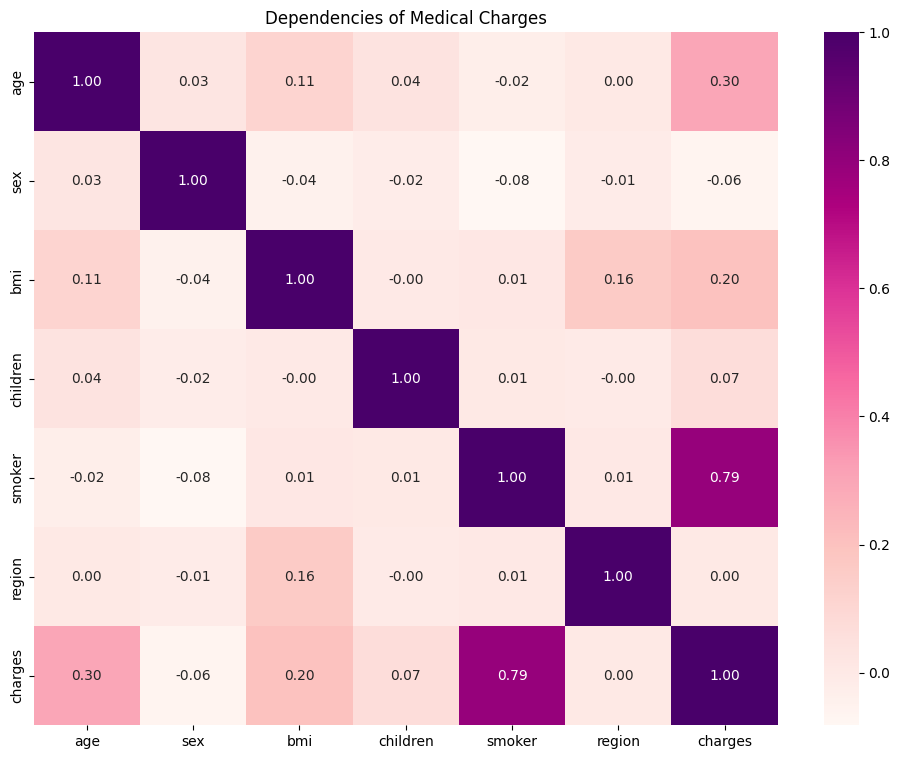

In [ ]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, cmap='RdPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('Cor')
plt.show()

Based on the heatmap, we can observe that the columns **sex**, **children**, and **region** have very low or **no correlation with medical charges**, indicating that they do not significantly affect the charges. \

\

On the other hand, the columns **age**, **bmi**, and especially **smoker** show a **stronger correlation with charges**. \

*Specifically, smoker has a very strong positive correlation*

In [ ]:
print(data['sex'].value_counts().sort_values())

sex
female    1366
male      1406
Name: count, dtype: int64


In [ ]:
print(data['smoker'].value_counts().sort_values())

smoker
yes     564
no     2208
Name: count, dtype: int64


In [ ]:
print(data['region'].value_counts().sort_values())

region
northeast    658
northwest    664
southwest    684
southeast    766
Name: count, dtype: int64


<ipython-input-13-0136df223a62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='charges', data=data_copy, palette='RdPu')


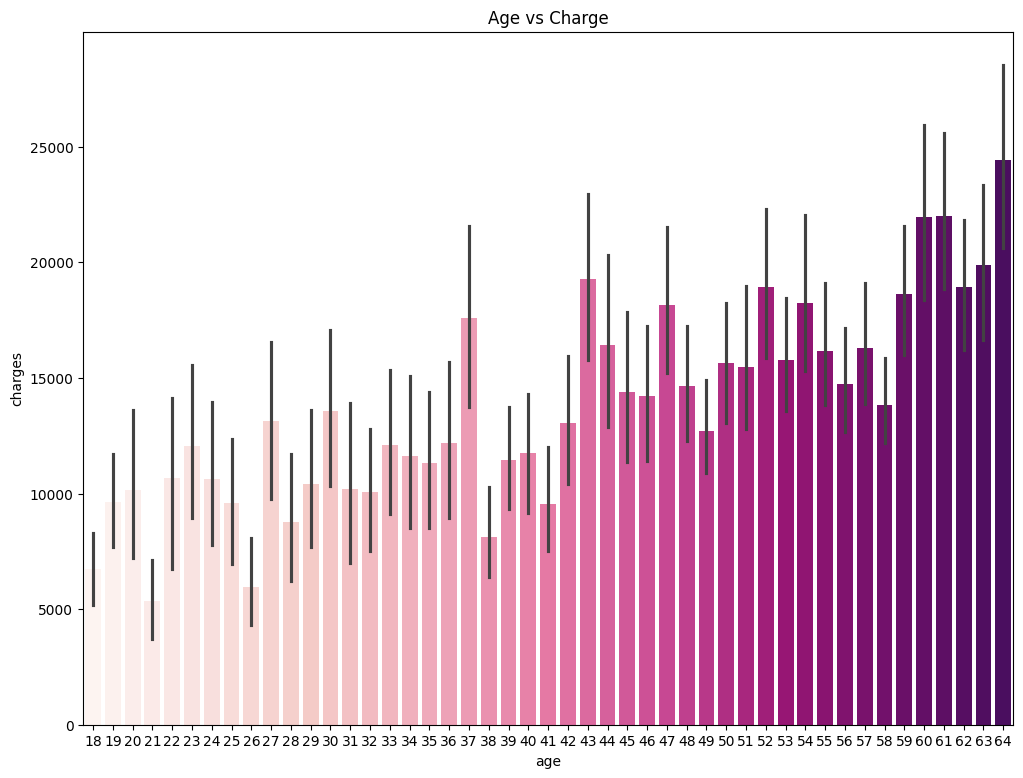

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=data_copy, palette='RdPu')
plt.savefig('AgevsCharges')

<ipython-input-14-f25b948dba95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='RdPu')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

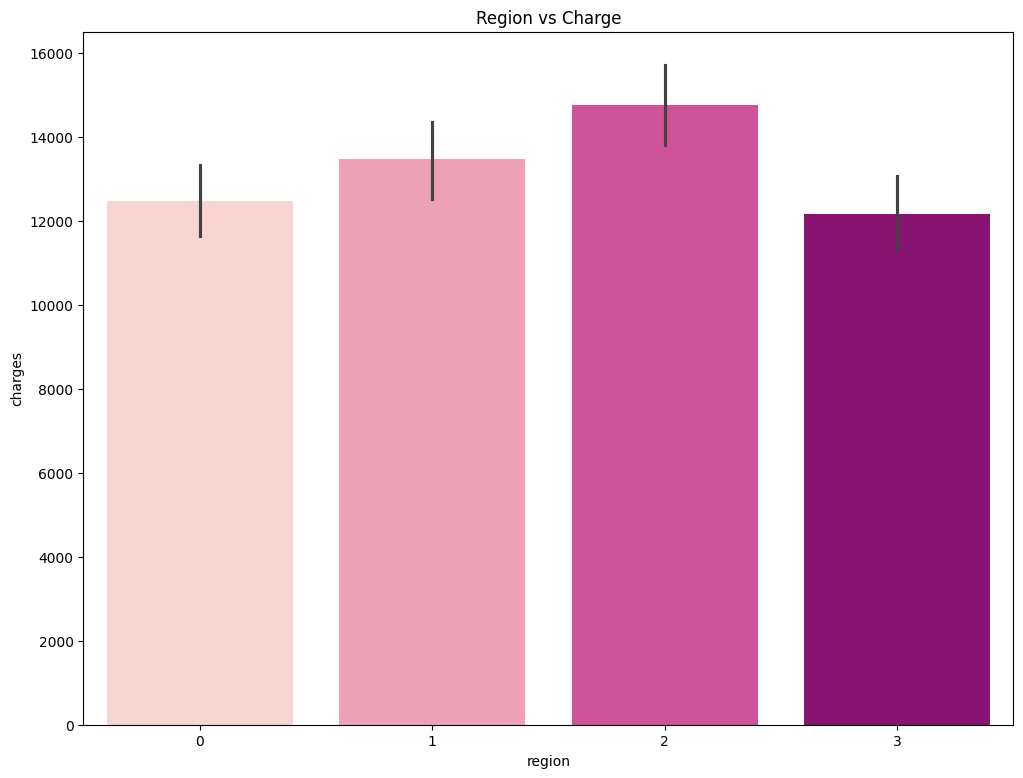

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='RdPu')

Text(0.5, 1.0, 'BMI VS Charge')

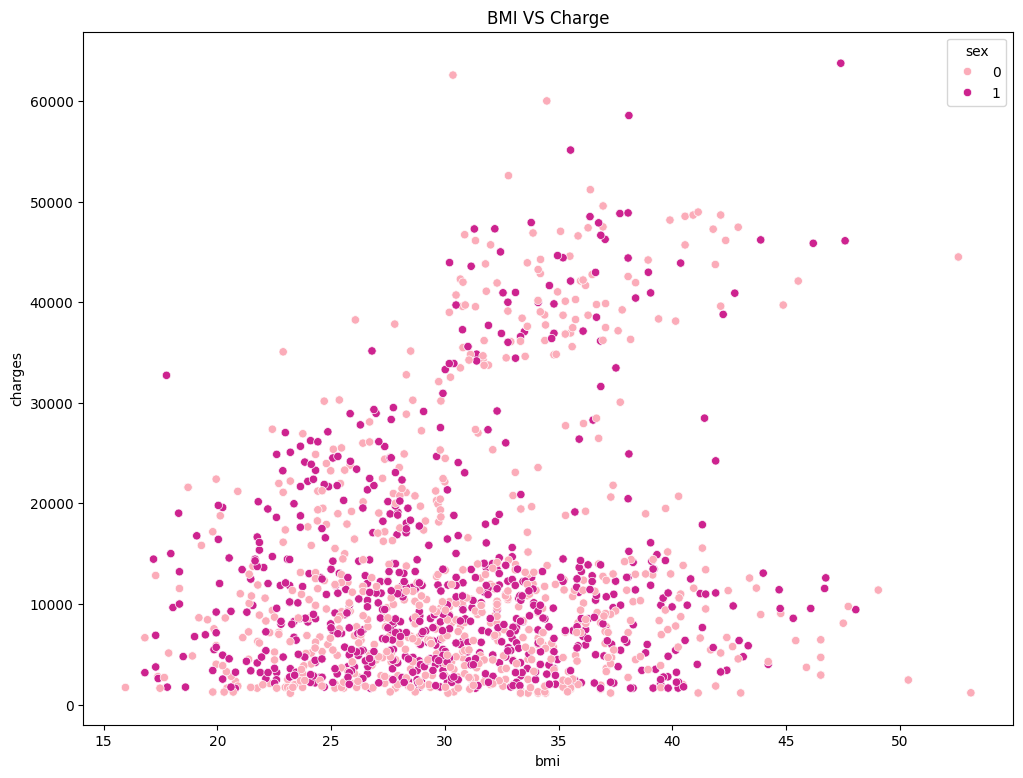

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy, palette='RdPu')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

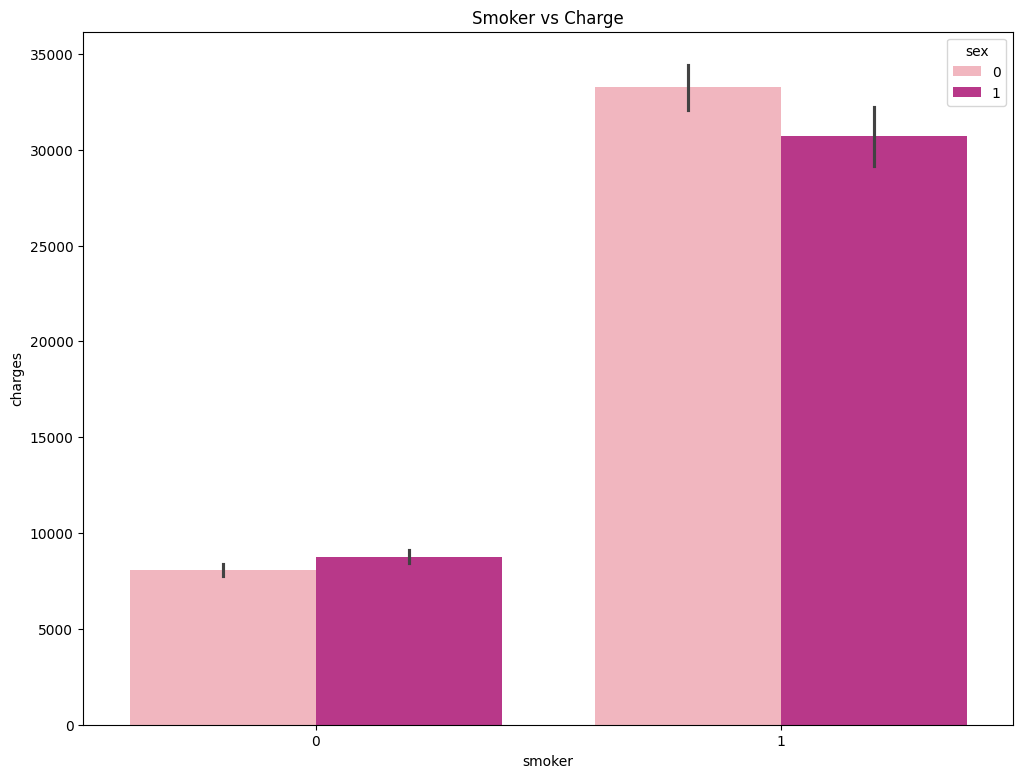

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='RdPu',hue='sex')

<ipython-input-17-eed6d4677fec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='RdPu')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

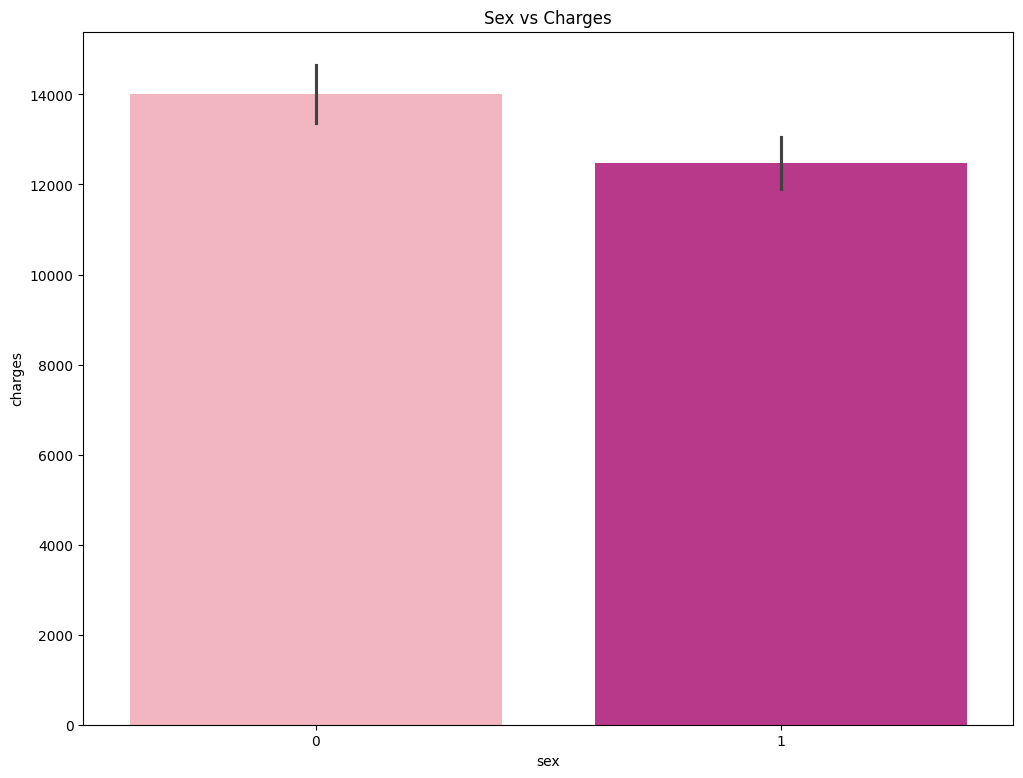

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='RdPu')

# Split Datasets to Train and Test

Splitting the dataset into 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X = data_copy.drop('charges', axis=1)
y = data_copy['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
1864,21,0,36.85,0,0,2
1997,38,1,34.80,2,0,3
1336,21,1,25.80,0,0,3
655,52,1,25.30,2,1,2
261,20,1,26.84,1,1,2


In [ ]:
y_train.head()

,charges
1864,1534.3045
1997,6571.5440
1336,2007.9450
655,24667.4190
261,17085.2676


In [ ]:
test_data = X_test.to_csv("test_data.csv", index=False)

In [ ]:
X_test.head()

,age,sex,bmi,children,smoker,region
1106,49,1,29.925,0,0,0
1321,62,0,26.695,0,1,1
2313,57,1,20.100,1,0,3
2274,22,0,39.500,0,0,3
1432,18,1,38.665,2,0,1


In [ ]:
y_test.head()

,charges
1106,8988.15875
1321,28101.33305
2313,12032.32600
2274,1682.59700
1432,3393.35635


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()

In [ ]:
X_test['children'].value_counts()

,count
children,
0,244
1,126
2,107
3,58
5,11
4,9


In [ ]:
numerical_columns = ['age','children', 'bmi']
numerical_pipeline = make_pipeline(StandardScaler())

In [ ]:
categorical_columns = ['region']
categorical_pipeline = make_pipeline(OneHotEncoder())

In [ ]:
to_pass = ['sex','smoker']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ('pass', 'passthrough', to_pass)
    ]
)

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
print("Transformed train features shape:", X_train_transformed.shape)

Transformed train features shape: (2217, 9)


In [ ]:
X_test_transformed = preprocessor.transform(X_test)
print("Transformed test features shape:", X_test_transformed.shape)

Transformed test features shape: (555, 9)


In [ ]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
print("y_train shape:", y_train.shape)

y_train shape: (2217,)


In [ ]:
print("X_train_transformed type:", type(X_train_transformed))
print("X_train_transformed type:", type(X_train_transformed))

if hasattr(X_train_transformed, 'shape'):
    print("X_train_transformed shape:", X_train_transformed.shape)

print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)

X_train_transformed type: <class 'numpy.ndarray'>
X_train_transformed type: <class 'numpy.ndarray'>
X_train_transformed shape: (2217, 9)
y_train type: <class 'numpy.ndarray'>
y_train shape: (2217,)


# Models 🌱

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return (f"R² Score: {r2}\nRMSE: {rmse}\nMAE: {mae}")

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [ ]:
model1.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
y_pred = model1.predict(X_test_transformed)

### Result

In [ ]:
print(evaluate_model(y_test, y_pred))

R² Score: 0.7398166177564298
RMSE: 6319.271678607551
MAE: 4160.247974762999


In [ ]:
y_test_mock = y_test.copy()
y_test_mock.iloc[0] = 1_000_000
print(evaluate_model(y_test_mock, y_pred))

R² Score: 0.053323173854687655
RMSE: 42479.552641897644
MAE: 5940.831338814403


### Comparision predicted and actual data

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
comparison_df.head()

,Actual,Predicted,Difference
1106,8988.15875,10382.195851,-1394.037101
1321,28101.33305,36850.703702,-8749.370652
2313,12032.32600,9010.642378,3021.683622
2274,1682.59700,5910.228930,-4227.631930
1432,3393.35635,6661.467930,-3268.111580


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model2.predict(X_test)

### Result

In [ ]:
print(evaluate_model(y_test, y_pred))

R² Score: 0.9509946653491352
RMSE: 2742.5144792595984
MAE: 1280.4140463725769


### Comparision predicted and actual data

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
comparison_df.head()

,Actual,Predicted,Difference
1106,8988.15875,9871.719813,-883.561063
1321,28101.33305,28251.212836,-149.879786
2313,12032.32600,12378.668618,-346.342618
2274,1682.59700,2034.159166,-351.562166
1432,3393.35635,4376.058654,-982.702304


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

model3 = GradientBoostingRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [i for i in range(100, 1001, 100)],
    'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 1.0],
}

In [ ]:
random_search = RandomizedSearchCV(estimator=model3, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.02, 0.03, 0.05,
                                                          0.07, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42)

In [ ]:
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.1}


In [ ]:
y_pred_gb = random_search.best_estimator_.predict(X_test)

### Result

In [ ]:
print(evaluate_model(y_test, y_pred_gb))

R² Score: 0.9610162498076097
RMSE: 2446.0709911695176
MAE: 695.4409347310996


### Comparision predicted and actual data

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
comparison_df.head()

,Actual,Predicted,Difference
1106,8988.15875,9871.719813,-883.561063
1321,28101.33305,28251.212836,-149.879786
2313,12032.32600,12378.668618,-346.342618
2274,1682.59700,2034.159166,-351.562166
1432,3393.35635,4376.058654,-982.702304


## XGBoost - final model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train['region'] = X_train["region"].astype("category")

In [ ]:
X_train['region']

,region
1864,2
1997,3
1336,3
655,2
261,2
...,...
1638,2
1095,1
1130,2
1294,1


In [ ]:
param_grid = {
    'n_estimators': [i for i in range(100, 1001, 100)],
    'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

In [ ]:
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True)

In [ ]:
# XGBoost built-in feature importance
from xgboost import plot_importance
plt.figure(figsize=(10, 6))
plot_importance(best_model)
plt.title('XGBoost Feature Importance')
plt.show()

NotFittedError: need to call fit or load_model beforehand

<Figure size 1000x600 with 0 Axes>

In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
print("Best Hyperparameters found: ", random_search.best_params_)

In [ ]:
random_search.best_estimator_

In [ ]:
best_model = xgb.XGBRegressor(
    **random_search.best_params_,
    objective='reg:squarederror', enable_categorical=True
)
best_model.fit(X_train, y_train)

In [ ]:
y_pred = best_model.predict(X_test)
print(evaluate_model(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

comparison_df.head()

In [ ]:
np.abs(comparison_df['Difference']).median()

In [ ]:
np.abs(comparison_df['Difference'])

In [ ]:
percentiles = np.percentile(np.abs(comparison_df['Difference']), [10, 25, 50, 75, 80, 85, 90, 99])

In [ ]:
list(percentiles)

# SHAP values

In [ ]:
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

The SHAP summary plot gives a broad understanding of how each feature influences the model, where smoker has a strong impact, and children appears less influential.

In [ ]:
shap.dependence_plot('age', shap_values, X_test)

The dependence plot for age suggests a relationship between age and the target variable that is influenced by the children feature. \
The interaction between these two features shows how children might moderate the influence of age on the prediction.

## Random person results

In [ ]:
random_index = np.random.choice(X_test.index)
random_person = X_test.loc[random_index].values.reshape(1, -1)
random_person_dmatrix = xgb.DMatrix(random_person)
print(f'random index: {random_index}\nrandom person:\n{random_person}')

In [ ]:
predicted_cost = best_model.predict(random_person)
print(f"Predicted cost for the random person: {predicted_cost[0]}")

In [ ]:
shap_values_for_person = explainer.shap_values(random_person_dmatrix)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_for_person, random_person, feature_names=X_test.columns)

# Visualize Results 🧚🏻‍♀️

In [ ]:
plt.figure(figsize=(12, 9))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 80, 'color': '#0B1D51'}, line_kws={'color': '#FFC1CF'})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.show()

In [ ]:

import shap

# Compute SHAP values
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)

# SHAP summary plot
shap.summary_plot(shap_values, X_train)

# XGBoost built-in feature importance
from xgboost import plot_importance
plt.figure(figsize=(10, 6))
plot_importance(best_model)
plt.show()
